# CS 224D Assignment #2
# Part [0]: Warmup: Boolean Logic

To appreciate the power of neural networks to learn complex patterns, it can help to revisit a classic example. It is well-known that a single linear classifier cannot represent the XOR function $x \oplus y$, depicted below*: there is no way to draw a single line that can separate the red and magenta (square) points from the blue and cyan (circle) points.

*Gaussian noise is added to make the point clouds more illustrative; however, you can perform your analysis as if all points were truly boolean variables $(x,y) \in \{0,1\}^2$.

In [55]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
colors = 'rbcm'
markers = 'soos'
def show_pts(data):
    for i in range(4):
        idx = (arange(len(data[0])) % 4 == i)
        plot(data[0,idx], data[1,idx], 
             marker=markers[i], linestyle='.',
             color=colors[i], alpha=0.5)
    gca().set_aspect('equal')

def show_pts_1d(data):
    for i in range(4):
        idx = (arange(len(data)) % 4 == i)
        plot(data[idx], marker=markers[i], linestyle='.',
             color=colors[i], alpha=0.5)
    gca().set_aspect(len(data)/4.0)
    
#### Copy in your implementation from Assignment #1 ####
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # dummy
#### or if the starter code is posted, uncomment the line below ####
# from nn.math import sigmoid

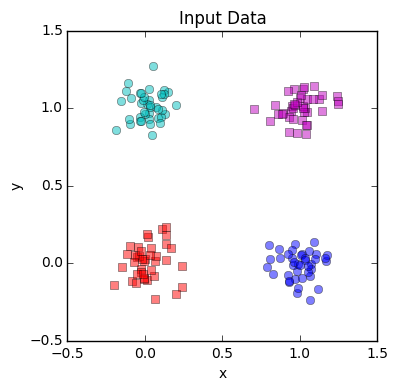

In [57]:
npts = 4 * 40; random.seed(10)
x = random.randn(npts)*0.1 + array([i & 1 for i in range(npts)])
y = random.randn(npts)*0.1 + array([(i & 2) >> 1 for i in range(npts)])
data = vstack([x,y])
figure(figsize=(4,4)); show_pts(data); ylim(-0.5, 1.5); xlim(-0.5, 1.5)
xlabel("x"); ylabel("y"); title("Input Data")

A two-layer neural network, however, can separate this pattern easily. Below, we give you a simple dataset in two dimensions that represents a noisy version of the XOR pattern. Your task is to hand-pick weights for a *very* simple two-layer network, such that it can separate the red/magenta points from the blue/cyan points.

The network uses the following equations, for $W \in \mathbb{R}^{2\times2}$ and $U \in \mathbb{R}^{2}$:

$$ h = \sigma(z\cdot(Wx + b_1)) $$
$$ p = \sigma(z\cdot(Uh + b_2)) $$

where $z$ controls how steep the sigmoid function is; higher values make it approach a step function.

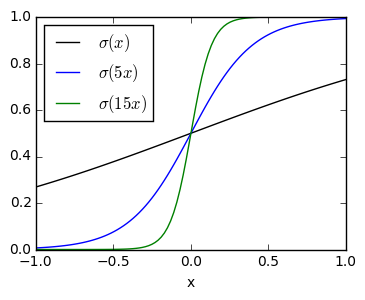

In [58]:
x = linspace(-1, 1, 100); figure(figsize=(4,3))
plot(x, sigmoid(x), 'k', label="$\sigma(x)$"); 
plot(x, sigmoid(5*x), 'b', label="$\sigma(5x)$");
plot(x, sigmoid(15*x), 'g', label="$\sigma(15x)$");
legend(loc='upper left'); xlabel('x');

In the area below, enter values for $W$, $b_1$, $U$, and $b_2$ that will properly place blue and cyan above the dashed line, and red and magenta below.

*Hint:* think about how you can make the data linearly separable after going through the hidden layer. Then find a direction $U$ along which you can separate it!

*Hint:* It may help to think about each "neuron" (i.e. row of $W$ or $U$) separately.

Raw Data:
[[0 1 0 1]
 [0 0 1 1]]
Hidden Activation:
[[ 0.5         0.92587593  0.92237054  0.99330715]
 [ 0.26894142  0.81381617  0.82127358  0.98201379]]
Grad:
[1.4454936848248827, 2.2659697157537484, 2.4943584328019619]
Intepret:
[-0.45380542104244626, -0.52453164459973955, -0.51200721060197907]
U and b2:
[-1.44549368  1.        ]
0.482906315822
Test Linear Classifer:
[ 0.02910089 -0.04162533 -0.02910089  0.02910089]
p:
[ 0.53631208  0.44815535  0.46368792  0.53631208]


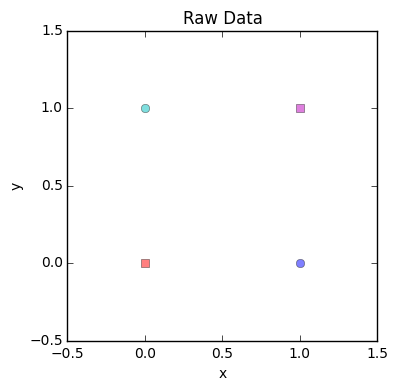

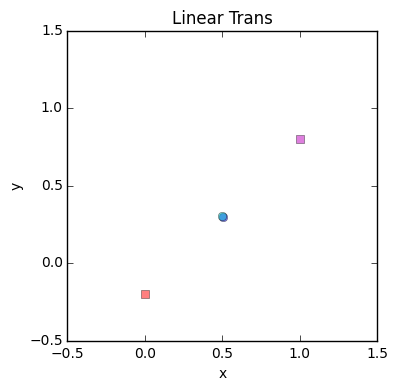

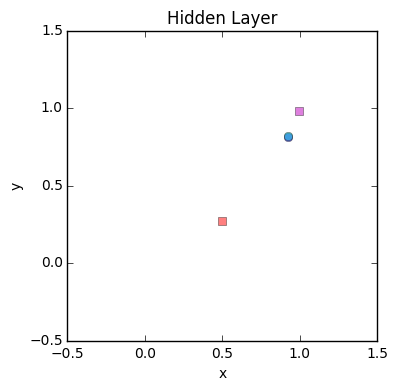

In [62]:
W = zeros((2,2))
b1 = zeros((2,1))
U = zeros(2)
b2 = 0

#### YOUR CODE HERE ####
cos45 = np.cos(np.pi / 4)
sin45 = np.sin(np.pi / 4)
revRot = np.array([[cos45, -sin45], [sin45, cos45]])
rot = np.array([[cos45, sin45], [-sin45, cos45]])
squz = np.array([[1.0 / 100, 0], [0, 1]])

W = rot.dot(squz).dot(revRot)

b1 = np.array([0, -0.2]).reshape(2, 1)

z = 5 # control gate steepness

#### END YOUR CODE ####

# Feed-forward computation
data = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
# data = data[:, :4]
print "Raw Data:"
print data
figure(figsize=(4,4)); ylim(-0.5, 1.5); xlim(-0.5, 1.5)
xlabel("x"); ylabel("y"); title("Raw Data")
show_pts(data)

figure(figsize=(4,4)); ylim(-0.5, 1.5); xlim(-0.5, 1.5)
xlabel("x"); ylabel("y"); title("Linear Trans")
show_pts(rot.dot(squz).dot(revRot).dot(data) + b1)

print "Hidden Activation:"
h = sigmoid(z * (W.dot(data) + b1))
print h

print "Grad:"
def grad(h, a, b):
    return (h[1, a] - h[1, b]) / (h[0, a] - h[0, b])
print [grad(h, 3, 0), grad(h, 3, 2), grad(h, 3, 1)]
print "Intepret:"
def intep(h, a):
    return h[1, a] - h[0, a] * (h[1, 3] - h[1, 0]) / (h[0, 3] - h[0, 0])
inteps = [intep(h, i) for i in range(3)]
print inteps
#### YOUR CODE HERE ####
print "U and b2:"
U = np.array([-(h[1, 3] - h[1, 0]) / (h[0, 3] - h[0, 0]), 1])
print U
inteps.sort()
b2 = np.array(-(inteps[1] + inteps[2]) / 2.0)
print b2
#### END YOUR CODE ####
print "Test Linear Classifer:"
print U.dot(h) + b2

figure(figsize=(4,4)); ylim(-0.5, 1.5); xlim(-0.5, 1.5)
xlabel("x"); ylabel("y"); title("Hidden Layer")
show_pts(h)

p = sigmoid(z*(U.dot(h) + b2))

print "p:"
print p


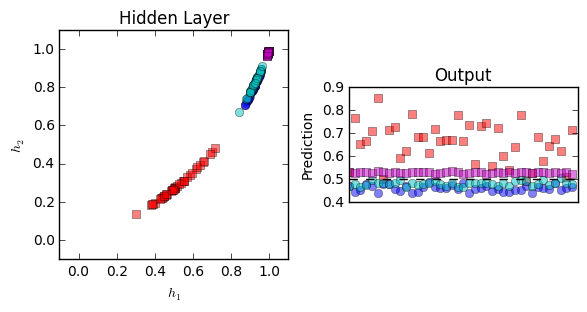

In [61]:
# Plot hidden layer
subplot(1,2,1); show_pts(h)
title("Hidden Layer"); xlabel("$h_1$"); ylabel("$h_2$")
ylim(-0.1, 1.1); xlim(-0.1, 1.1)
# Plot predictions
subplot(1,2,2); show_pts_1d(p)
title("Output"); ylabel("Prediction"); xticks([]);
axhline(0.5, linestyle='--', color='k')
tight_layout()